# Logistic Regression

## 1. Data Pre-processing

### Load the dataset

In [1]:
import pandas as pd

data = pd.read_csv('dataset.csv')
data

,Attractive Level,Sound,Music,Noise control,Speaking Style,Camera,Stable,Angel diversity,Images,Resolution,Color,Content,Introduction,Food description,Reviewer,Reviewer emotion,Recommendation,Clear information
0,3,4,4,3,4,4,4,1,5,4,5,4,1,1,3,2,0,1
1,2,3,3,1,3,3,2,1,3,3,3,3,1,1,3,3,1,1
2,4,4,4,2,3,4,4,1,4,5,4,4,1,1,4,3,1,1
3,2,2,2,1,3,3,4,1,2,4,1,3,1,0,2,2,0,1
4,2,3,3,2,3,3,4,0,3,4,2,3,1,0,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,4,4,3,3,4,4,3,1,4,4,4,4,1,1,4,3,1,1
131,3,3,3,3,3,3,4,1,3,4,3,3,1,1,3,2,0,1
132,4,4,4,2,4,4,4,1,4,4,4,4,1,1,4,3,1,1
133,2,3,3,3,3,3,3,1,4,4,4,2,1,1,4,2,0,1


In [2]:
pd.options.mode.chained_assignment = None
for i, o in enumerate(data.loc[:, "Attractive Level"]):
    if o > 2:
        data.loc[:, "Attractive Level"][i] = 1
    else:
        data.loc[:, "Attractive Level"][i] = 0

# data.drop("ID", axis=1, inplace=True)
data

,Attractive Level,Sound,Music,Noise control,Speaking Style,Camera,Stable,Angel diversity,Images,Resolution,Color,Content,Introduction,Food description,Reviewer,Reviewer emotion,Recommendation,Clear information
0,1,4,4,3,4,4,4,1,5,4,5,4,1,1,3,2,0,1
1,0,3,3,1,3,3,2,1,3,3,3,3,1,1,3,3,1,1
2,1,4,4,2,3,4,4,1,4,5,4,4,1,1,4,3,1,1
3,0,2,2,1,3,3,4,1,2,4,1,3,1,0,2,2,0,1
4,0,3,3,2,3,3,4,0,3,4,2,3,1,0,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,1,4,3,3,4,4,3,1,4,4,4,4,1,1,4,3,1,1
131,1,3,3,3,3,3,4,1,3,4,3,3,1,1,3,2,0,1
132,1,4,4,2,4,4,4,1,4,4,4,4,1,1,4,3,1,1
133,0,3,3,3,3,3,3,1,4,4,4,2,1,1,4,2,0,1


### Imbalanced Data

Counter({1: 101, 0: 34})


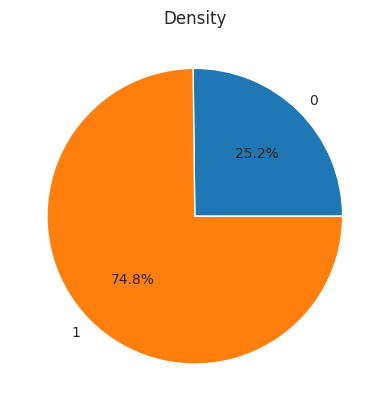

In [3]:
from matplotlib import pyplot as plt
from collections import Counter

density = data.loc[:, "Attractive Level"].tolist()
print(Counter(density))

plt.title("Density")
plt.pie([density.count(0), density.count(1)], labels=["0", '1'], autopct='%1.1f%%')
plt.show()

### Upsampling by copying minority class instances

In [4]:
from sklearn.utils import resample

zero_data = data[data["Attractive Level"] == 0]
one_data = data[data["Attractive Level"] == 1]

zero_data = resample(zero_data, replace=True, n_samples=len(one_data), random_state=2)

data = zero_data.append(one_data)
data

/tmp/ipykernel_662811/861839517.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = zero_data.append(one_data)


,Attractive Level,Sound,Music,Noise control,Speaking Style,Camera,Stable,Angel diversity,Images,Resolution,Color,Content,Introduction,Food description,Reviewer,Reviewer emotion,Recommendation,Clear information
56,0,3,3,3,2,2,3,0,3,4,3,2,0,0,2,2,0,0
37,0,3,3,3,3,2,4,0,3,4,3,2,0,0,2,2,0,0
104,0,4,4,3,3,3,3,0,3,4,3,3,1,0,2,2,0,0
70,0,2,1,3,4,4,5,0,3,4,3,3,0,1,3,2,0,1
46,0,3,4,3,3,3,4,1,2,3,3,2,0,0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,3,3,3,4,4,3,1,3,4,3,4,1,1,4,3,0,1
130,1,4,3,3,4,4,3,1,4,4,4,4,1,1,4,3,1,1
131,1,3,3,3,3,3,4,1,3,4,3,3,1,1,3,2,0,1
132,1,4,4,2,4,4,4,1,4,4,4,4,1,1,4,3,1,1


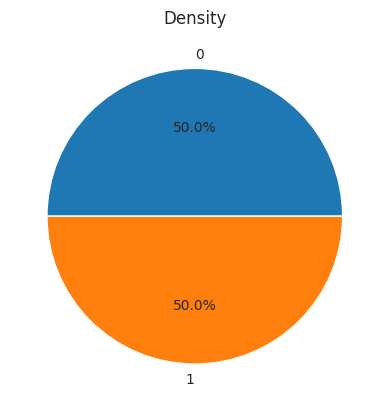

New data shape: (202, 18)
Counter({0: 101, 1: 101})


In [5]:
density = data.loc[:, "Attractive Level"].tolist()

plt.title("Density")
plt.pie([density.count(0), density.count(1)], labels=["0", '1'], autopct='%1.1f%%')
plt.show()

print(f"New data shape: {data.shape}")
print(Counter(density))

### Extracting Independent and Dependent Variable

In [6]:
# Independent
X = data.iloc[:, 1:].values
X

array([[3, 3, 3, ..., 2, 0, 0],
       [3, 3, 3, ..., 2, 0, 0],
       [4, 4, 3, ..., 2, 0, 0],
       ...,
       [3, 3, 3, ..., 2, 0, 1],
       [4, 4, 2, ..., 3, 1, 1],
       [5, 5, 4, ..., 3, 1, 1]])

In [7]:
# Dependent: "Attractive Level"
y = data.iloc[:, 0].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

### Correlation Coefficient

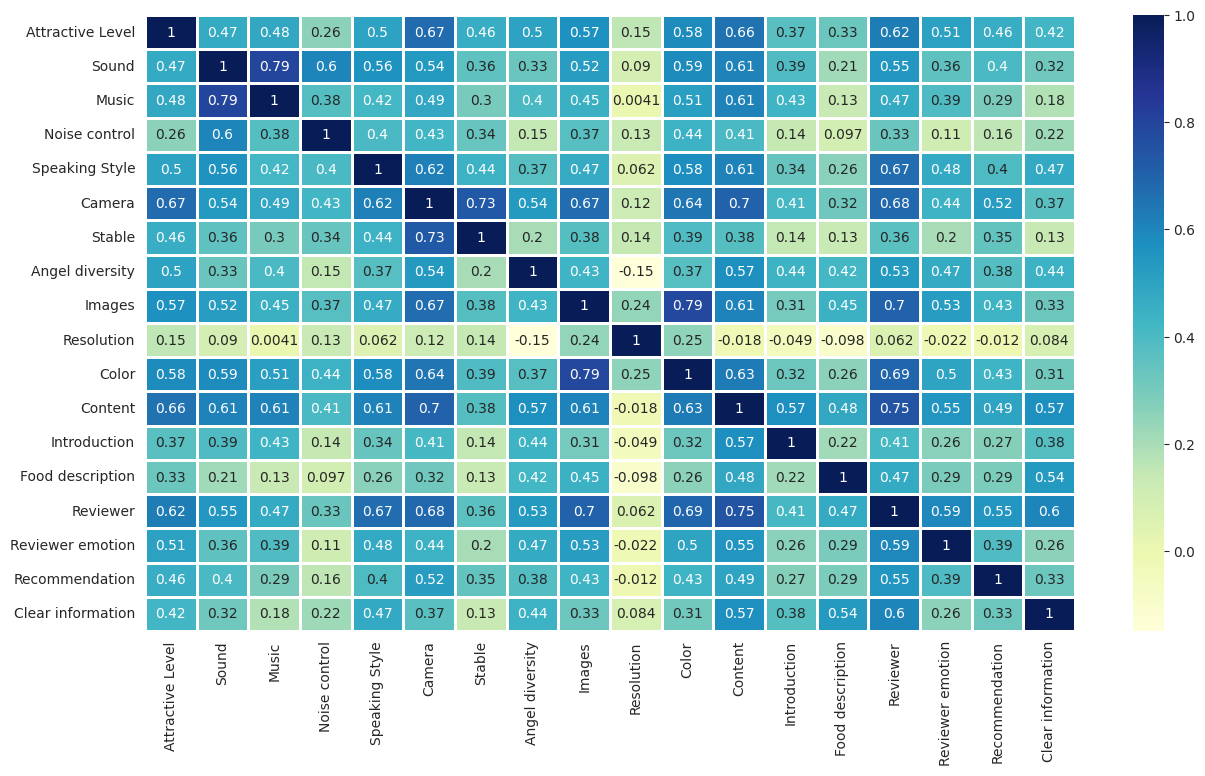

In [8]:
import seaborn as sns

plt.figure(figsize = (15, 8))
dataplot = sns.heatmap(data.corr(),annot = True,linewidths=1, cmap='YlGnBu')
plt.tick_params(axis="x", labelsize=10)
plt.tick_params(axis="y", labelsize=10)
plt.show()

### Splitting the dataset into training and test set

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=0)

"Train", X_train.shape,"Test", X_test.shape

('Train', (151, 17), 'Test', (51, 17))

## 2. Fitting Logistic Regression to the Training set

### Feature scaling

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.0966229 ,  1.07873679, -2.02026631, ...,  1.30321735,
        -0.55950288, -1.44278642],
       [-1.21893506, -0.67276058, -0.01987147, ..., -0.72550244,
        -0.55950288,  0.69310328],
       [-0.0966229 ,  0.20298811, -1.02006889, ...,  1.30321735,
         1.78730088,  0.69310328],
       ...,
       [-1.21893506,  0.20298811, -0.01987147, ...,  1.30321735,
        -0.55950288,  0.69310328],
       [-0.0966229 , -0.67276058,  1.98052336, ..., -0.72550244,
        -0.55950288,  0.69310328],
       [-1.21893506, -0.67276058, -1.02006889, ...,  1.30321735,
        -0.55950288, -1.44278642]])

### Training model

In [11]:
from sklearn.linear_model import LogisticRegression

regr = LogisticRegression(fit_intercept=False, random_state=0, max_iter=1000)
regr.fit(X_train, y_train)
coef = regr.coef_
coef

array([[ 0.11894178,  0.49235029, -0.19188561, -0.1135919 ,  0.57739995,
         0.73263791,  0.29741412, -0.39030368,  0.45608642,  0.98952295,
         0.95322789,  0.07543344,  0.11239974,  0.21169113,  0.49774332,
        -0.06355991,  0.31255741]])

## 3. Predicting the Test Result

In [12]:
y_pred = regr.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0])

### Get the Probability

In [13]:
y_proba = regr.predict_proba(X_test)
y_proba

array([[9.97984434e-01, 2.01556609e-03],
       [5.99950500e-01, 4.00049500e-01],
       [3.96542707e-03, 9.96034573e-01],
       [5.57365590e-01, 4.42634410e-01],
       [1.42609645e-01, 8.57390355e-01],
       [9.25254898e-03, 9.90747451e-01],
       [8.92926295e-01, 1.07073705e-01],
       [1.18601270e-03, 9.98813987e-01],
       [9.97075639e-01, 2.92436090e-03],
       [6.52510542e-02, 9.34748946e-01],
       [9.03694778e-01, 9.63052224e-02],
       [5.75333456e-01, 4.24666544e-01],
       [5.37462153e-01, 4.62537847e-01],
       [7.81727499e-01, 2.18272501e-01],
       [8.18386366e-01, 1.81613634e-01],
       [8.18386366e-01, 1.81613634e-01],
       [7.80922975e-01, 2.19077025e-01],
       [2.06948077e-04, 9.99793052e-01],
       [9.99375256e-01, 6.24743599e-04],
       [9.03694778e-01, 9.63052224e-02],
       [3.09593159e-02, 9.69040684e-01],
       [8.72034040e-02, 9.12796596e-01],
       [7.80922975e-01, 2.19077025e-01],
       [1.51799024e-01, 8.48200976e-01],
       [9.403236

## 4. Error and Accuracy of the result

In [14]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import numpy as np

y_train_pred = regr.predict(X_train)
print("Accuracy (Train):", accuracy_score(y_train, np.round(y_train_pred)))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Accuracy (Train): 0.8807947019867549
Accuracy: 0.9019607843137255
MAE: 0.09803921568627451
MSE: 0.09803921568627451
RMSE: 0.3131121455425747


### Visualize data

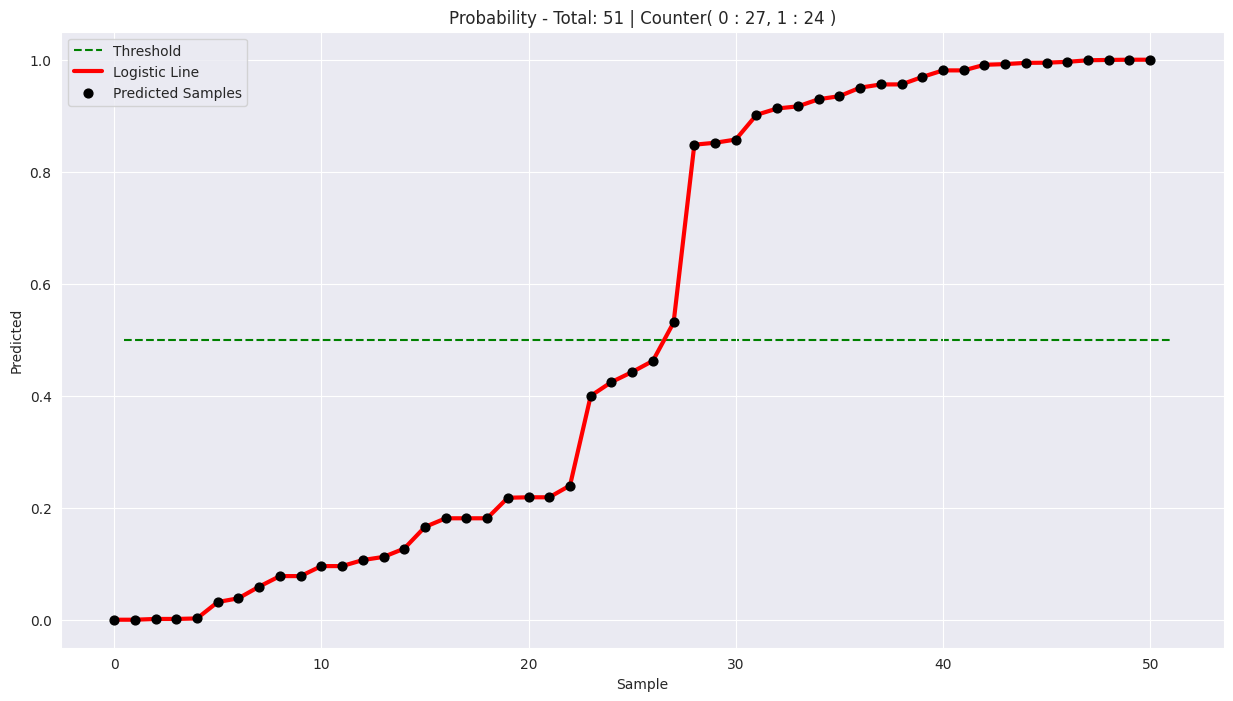

In [15]:
from collections import Counter

y_plot = []
for i in y_proba:
    # y_plot.append(i[0])
    y_plot.append(i[1])
y_plot.sort()
x_plot = [i for i in range(len(y_plot))]

plt.figure(figsize=(15, 8))
plt.title(f"Probability - Total: {len(y_pred)} | Counter( 0 : {Counter(y_pred)[0]}, 1 : {Counter(y_pred)[1]} )")
plt.xlabel("Sample")
plt.ylabel("Predicted")

plt.plot((0.5, len(y_plot)), (0.5, 0.5), 'g--', zorder=0)
plt.plot(x_plot, y_plot, c="r", linewidth=3, zorder=1)
plt.scatter(x_plot, y_plot, c="black", s=40)

plt.legend(['Threshold', 'Logistic Line', "Predicted Samples"])
plt.show()

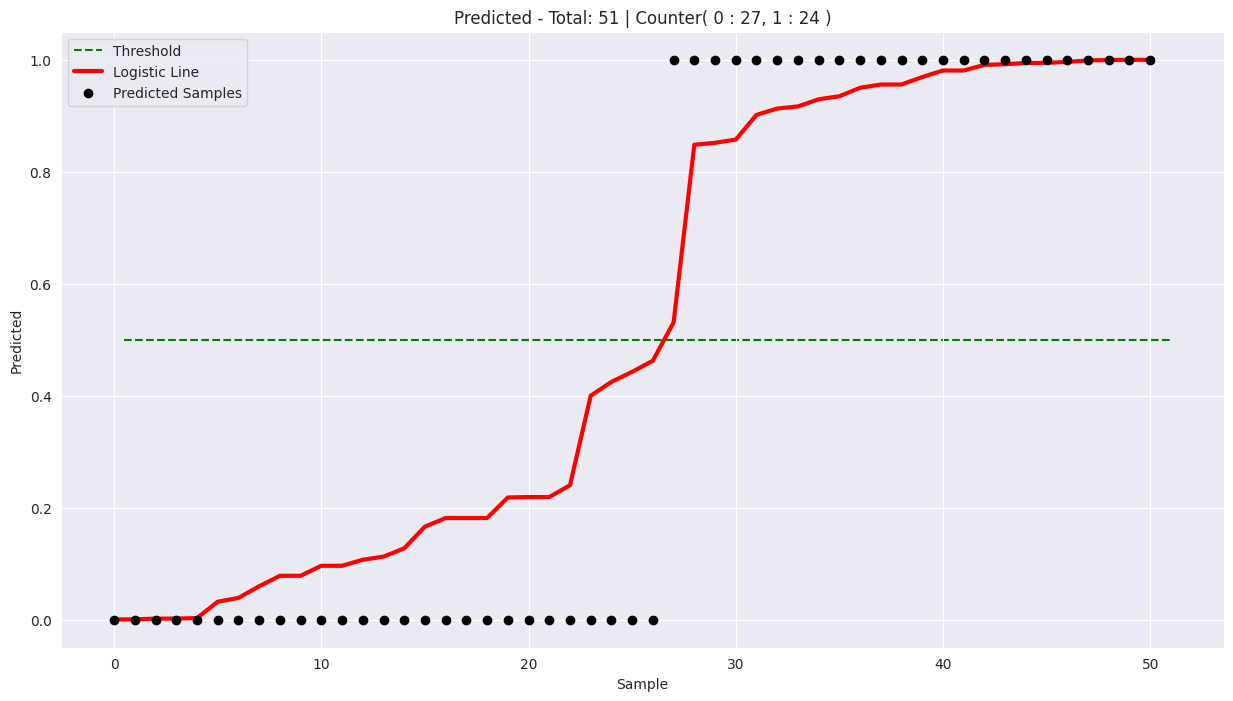

In [16]:
plt.figure(figsize=(15, 8))
plt.title(f"Predicted - Total: {len(y_pred)} | Counter( 0 : {Counter(y_pred)[0]}, 1 : {Counter(y_pred)[1]} )")
plt.xlabel("Sample")
plt.ylabel("Predicted")

y_pred.sort()
plt.plot((0.5, len(y_plot)), (0.5, 0.5), 'g--', zorder=0)
plt.plot(x_plot, y_plot, c="r", linewidth=3, zorder=1)
plt.scatter(x_plot, y_pred, c="black", zorder=2)

plt.legend(['Threshold', 'Logistic Line', "Predicted Samples"])
plt.show()